In [2]:
#loading librery nead
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [3]:
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")#load data set

In [4]:
df.head(-1)#see the starting 5 rows od the data set

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,8450,80,23000,Petrol,86,0,1300,3,4,5,1015
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015


In [5]:
df.isna().sum()# find null if any

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [6]:
df.info()# imfornation about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df.columns# name of the coloumns in the data set

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [8]:
print(df.shape)#gives the info about the no of the row and the coloum in the data set

(1436, 11)


In [9]:
df.size# 1436*11

15796

In [10]:
# Summary statistics
df.describe()#gives count, mean ,std info

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# Correlation Matrix


In [11]:
from sklearn.preprocessing import LabelEncoder
#converting the string values petrol des;e to numarical valur(0 is cng, 1 is desle & 2 is petrol)
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df.head(100)


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
95,19950,17,30351,1,90,0,1995,3,4,5,1260
96,15950,19,29435,2,97,0,1400,3,4,5,1100
97,15950,19,25948,2,97,0,1400,3,4,5,1100
98,18750,11,24500,2,110,0,1600,3,4,5,1120


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Gears      1436 non-null   int64
 8   Weight     1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
corr = df.corr()
corr
#pairwise correlation of all numerical columns

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


km & weight is highly corelated

cylinders have nan so we remove that & also doors

In [13]:
df.drop(columns=['Doors','Cylinders'],inplace=True)
corre = df.corr()
corre

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.014629,0.335637
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,-0.505303,0.089614,0.057249,0.335637,0.020613,1.000000


<Axes: >

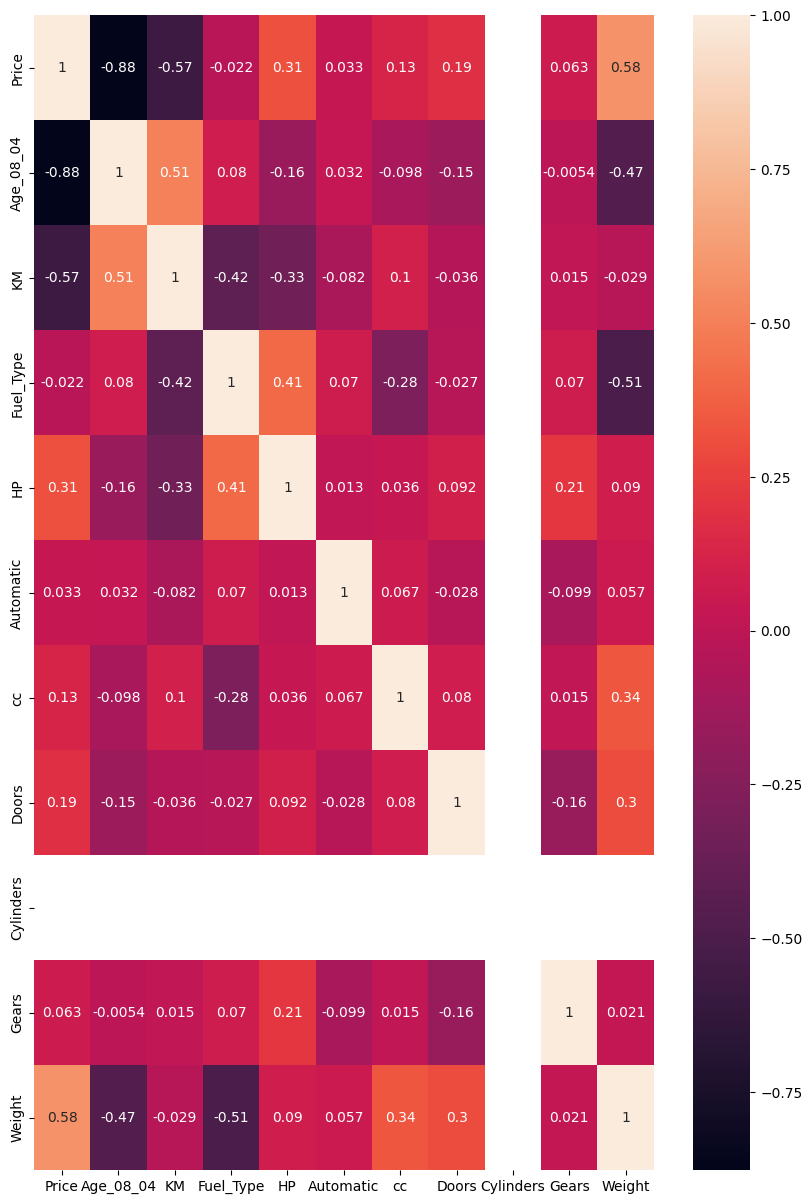

In [14]:
# Visualizations
plt.figure(figsize=(10,15))
sns.heatmap(corr,annot=True)

<Axes: xlabel='Price', ylabel='Count'>

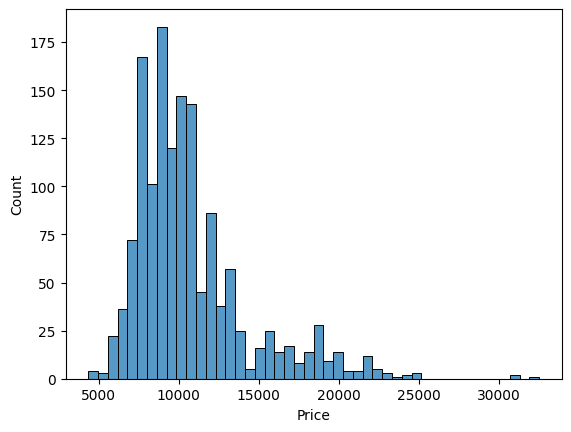

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Price',data=df)

<Axes: xlabel='Price', ylabel='Count'>

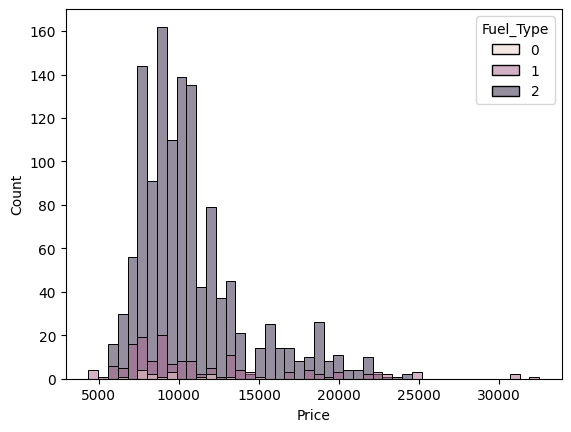

In [16]:
sns.histplot(x='Price',hue='Fuel_Type',data=df)

<Axes: xlabel='Price', ylabel='Age_08_04'>

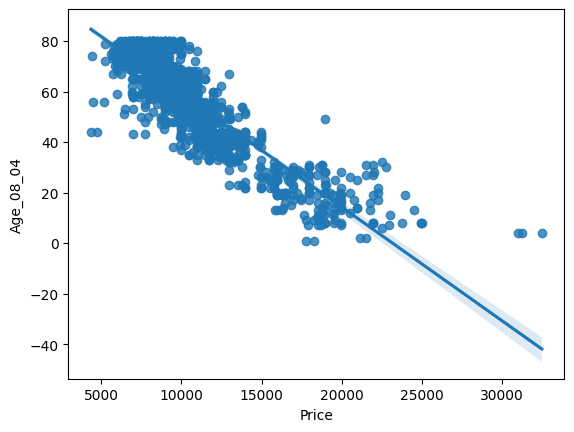

In [17]:
sns.regplot(x='Price',y='Age_08_04',data=df)

<Axes: xlabel='Weight', ylabel='HP'>

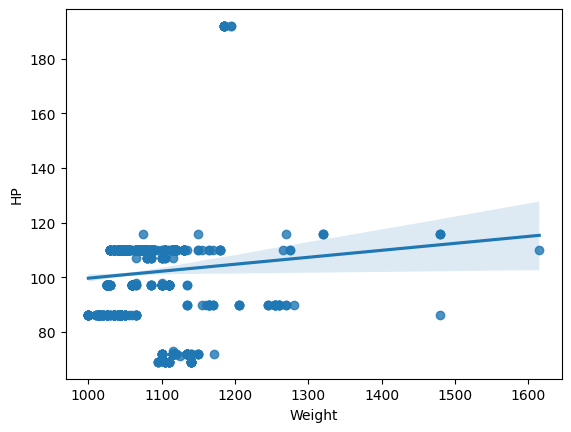

In [18]:
sns.regplot(x='Weight',y='HP',data=df)

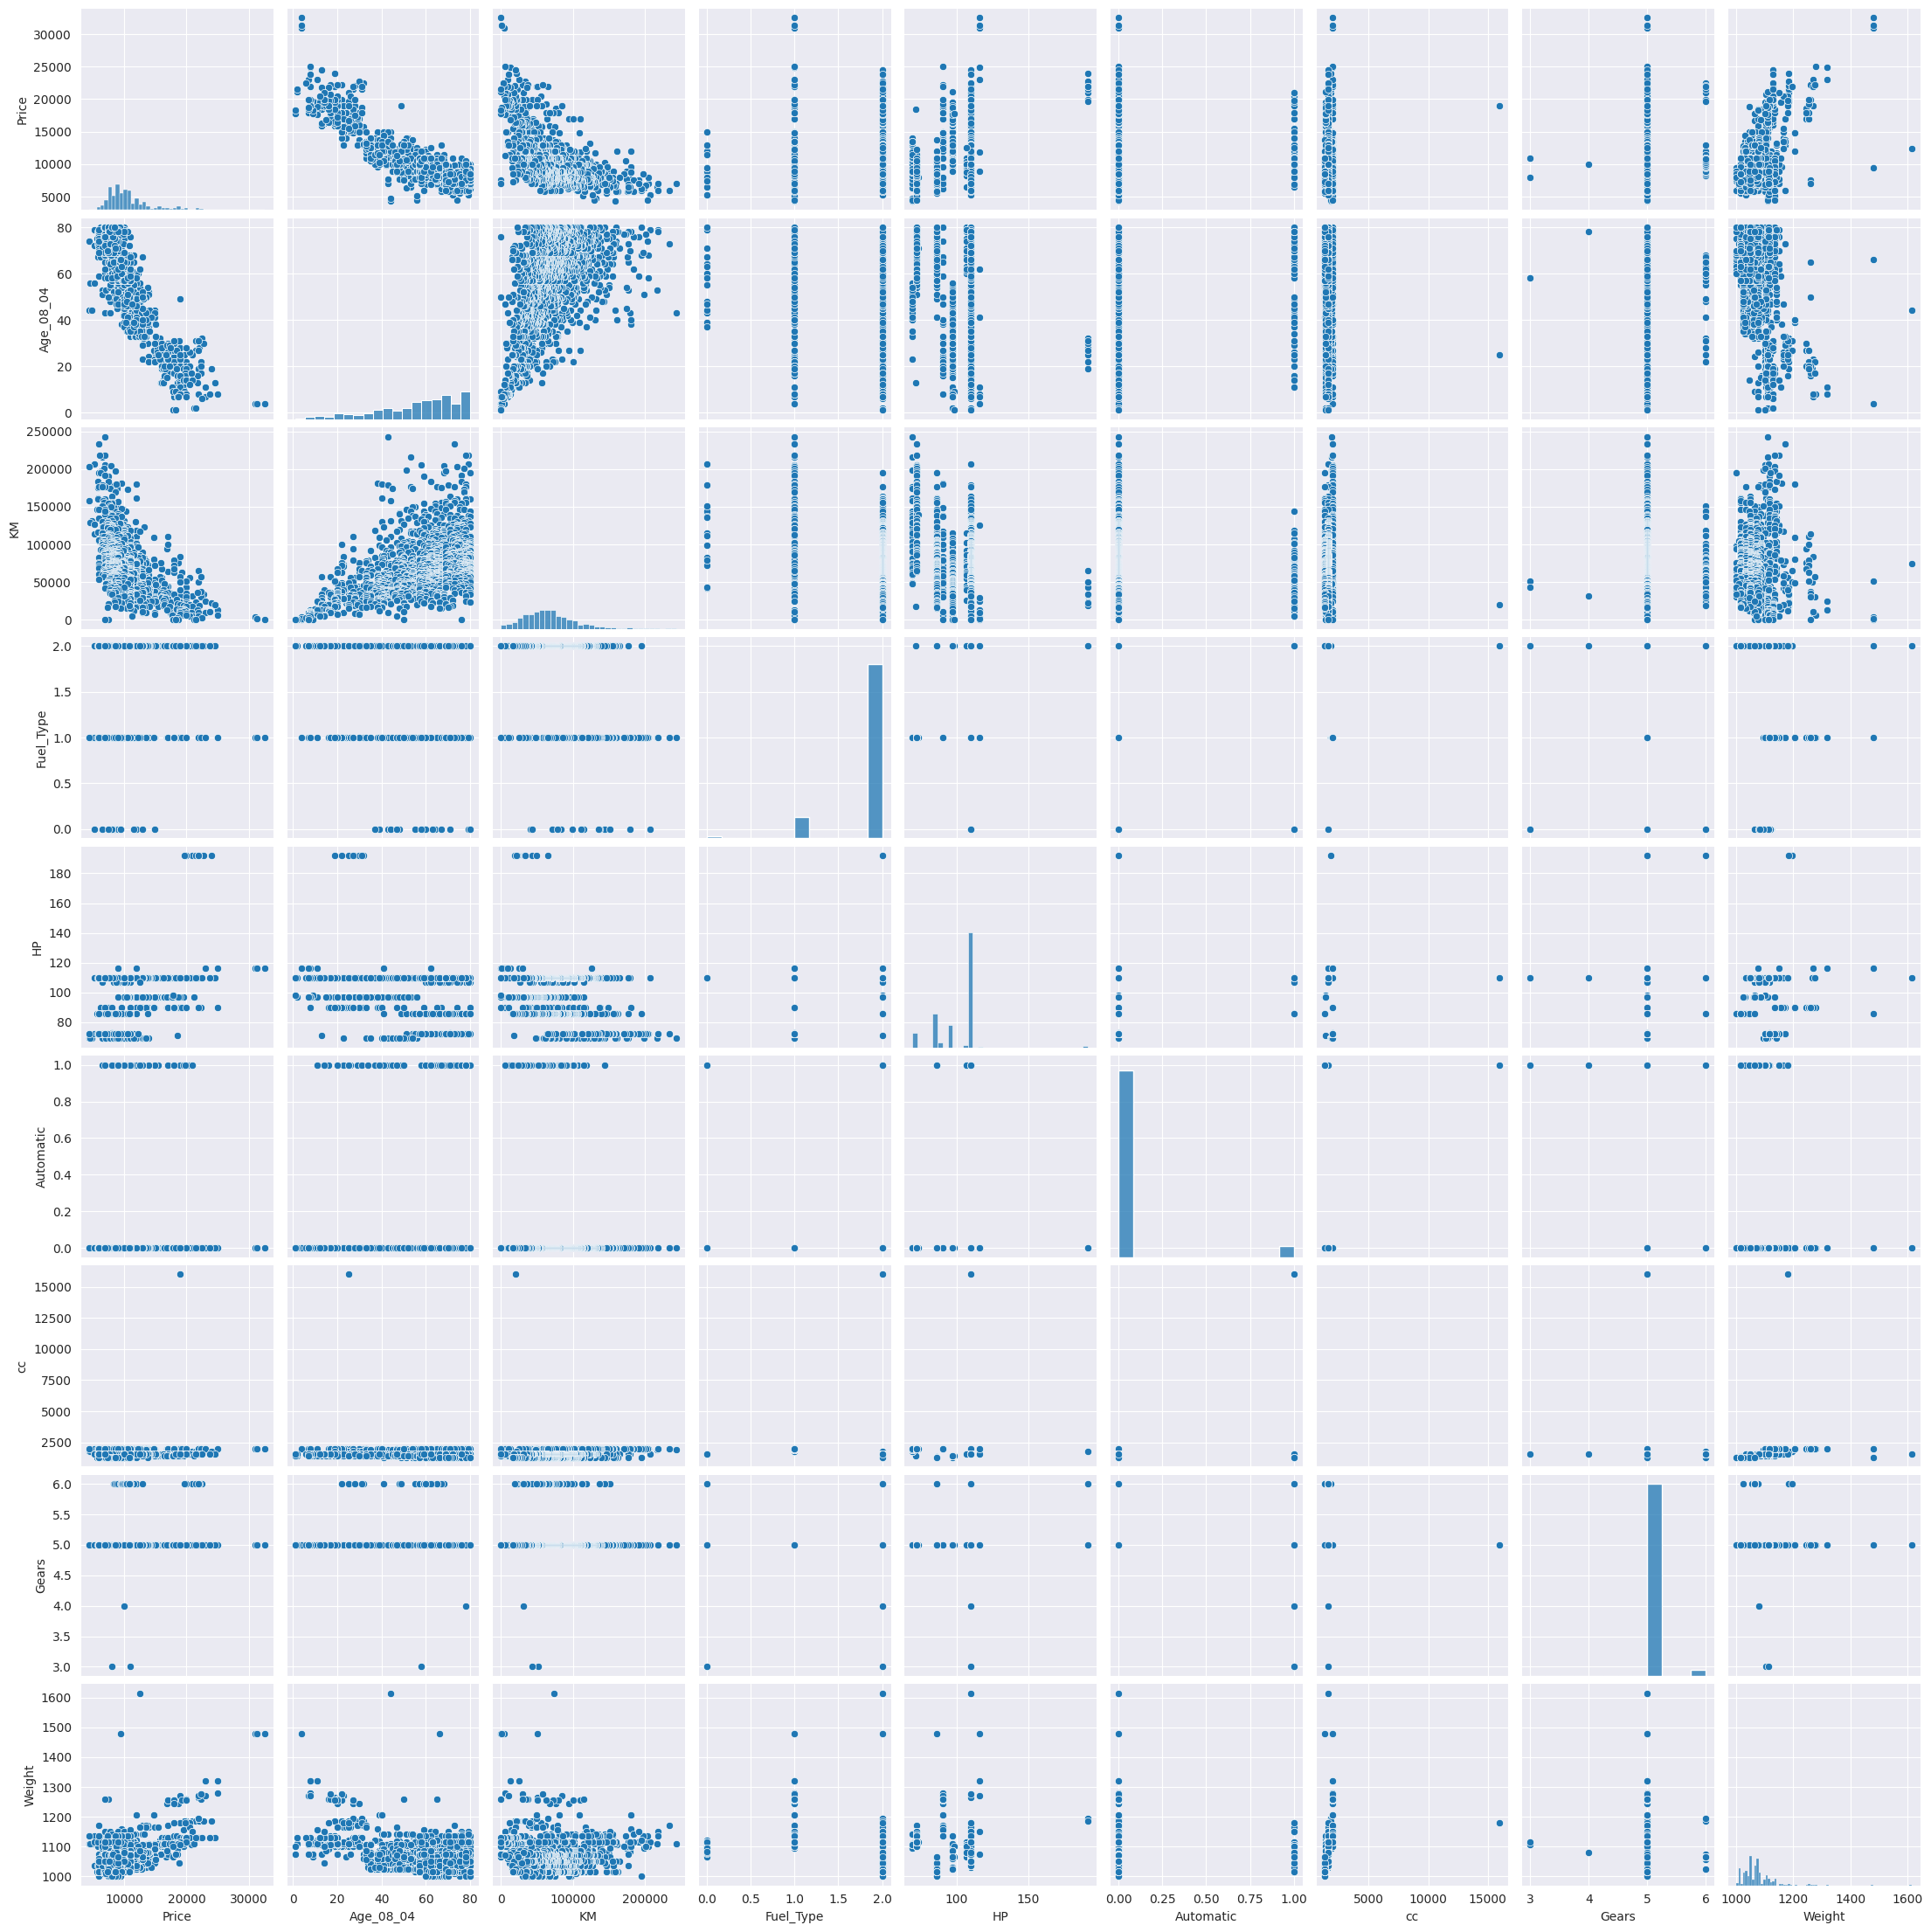

In [19]:


#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

Model Trinning and Evaluation

In [22]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500,23,46986,1,90,0,2000,5,1165
1,13750,23,72937,1,90,0,2000,5,1165
2,13950,24,41711,1,90,0,2000,5,1165
3,14950,26,48000,1,90,0,2000,5,1165
4,13750,30,38500,1,90,0,2000,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,5,1025
1432,10845,72,19000,2,86,0,1300,5,1015
1433,8500,71,17016,2,86,0,1300,5,1015
1434,7250,70,16916,2,86,0,1300,5,1015


In [23]:
# Dividing the data into input(variables) and output(Target)

X = df.iloc[:,1:] # input variables (Independent variables)
y = df.iloc[:,0] # price(dependent variable)

In [24]:
print(X)

      Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Gears  Weight
0            23  46986          1   90          0  2000      5    1165
1            23  72937          1   90          0  2000      5    1165
2            24  41711          1   90          0  2000      5    1165
3            26  48000          1   90          0  2000      5    1165
4            30  38500          1   90          0  2000      5    1170
...         ...    ...        ...  ...        ...   ...    ...     ...
1431         69  20544          2   86          0  1300      5    1025
1432         72  19000          2   86          0  1300      5    1015
1433         71  17016          2   86          0  1300      5    1015
1434         70  16916          2   86          0  1300      5    1015
1435         76      1          2  110          0  1600      5    1114

[1436 rows x 8 columns]


In [25]:
print(y)

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [26]:
# Splitting the dataset into the Training set and Test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [27]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (1148, 8)
Shape of X_test:  (288, 8)
Shape of y_train:  (1148,)
Shape of y_test:  (288,)


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

#### Model 1 :- Linear Regression

In [28]:
regg = LinearRegression()
regg.fit(X_train,y_train)

LinearRegression()

In [29]:
regg.coef_

array([-1.21461006e+02, -1.70095066e-02,  8.39612057e+02,  2.06134883e+01,
        2.57226821e+02, -7.28862869e-02,  5.66624645e+02,  2.32190680e+01])

In [30]:
regg.intercept_

-12601.660044881752

In [31]:
print('Training data score : ',regg.score(X_train,y_train))
print('Testing data score : ',regg.score(X_test,y_test))

Training data score :  0.8694255718969184
Testing data score :  0.8429419375585386


In [32]:
y_pred = regg.predict(X_test)

In [33]:
pd.DataFrame({'Actually data' : y_test,'Predicted data' : y_pred,'Difference in AD and PD' : y_test-y_pred})

,Actually data,Predicted data,Difference in AD and PD
594,10800,11151.935382,-351.935382
754,9950,8930.314724,1019.685276
630,7500,9385.680815,-1885.680815
1259,9250,8989.501802,260.498198
903,9750,10123.524791,-373.524791
...,...,...,...
174,21950,19160.922724,2789.077276
1428,8450,7968.609551,481.390449
297,12850,13576.550182,-726.550182
1435,6950,10696.541256,-3746.541256


In [34]:
# R2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("RMSE:", rmse)
print("MSE:", mse)

R2 Score: 0.8429419375585386
RMSE: 1447.616165755739
MSE: 2095592.5633573474


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
#Checkig for multicollinearity using VIF(variance inflation factor)
def VIF(X):
    vif_data = pd.DataFrame()
    vif_data["variables"] = X.columns
    vif_data["VIF_values"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [37]:
VIF(X)

,variables,VIF_values
0,Age_08_04,17.068088
1,KM,8.410716
2,Fuel_Type,47.620944
3,HP,66.407417
4,Automatic,1.114119
5,cc,17.300069
6,Gears,487.125771
7,Weight,380.154654


In [38]:
X=X.drop(['Fuel_Type','HP','Gears','Weight'],axis=1)

In [39]:
VIF(X)

,variables,VIF_values
0,Age_08_04,9.008430
1,KM,6.088279
2,Automatic,1.081764
3,cc,6.011155


In [40]:
# Again splitting the dataset into the Training set and Test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [41]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (1148, 4)
Shape of X_test:  (288, 4)
Shape of y_train:  (1148,)
Shape of y_test:  (288,)


In [42]:
print(X_train)

      Age_08_04      KM  Automatic    cc
899          62   59295          0  1300
881          68   61568          0  1600
310          40   38653          0  1600
1145         75  101855          0  1600
31           22   35199          0  1400
...         ...     ...        ...   ...
1095         76  125778          0  1600
1130         73  107108          0  1600
1294         80   71740          0  1600
860          63   64690          0  1300
1126         80  110000          0  1600

[1148 rows x 4 columns]


#### Model 2 :- Linear Regression

In [43]:
regg2 = LinearRegression()
regg2.fit(X_train,y_train)

LinearRegression()

In [44]:
regg2.coef_

array([-1.51517790e+02, -1.67306489e-02,  6.56439343e+02,  4.84170555e-01])

In [45]:
regg2.intercept_

19561.13726892467

In [46]:
print('Training data score : ',regg2.score(X_train,y_train))
print('Testing data score : ',regg2.score(X_test,y_test))

Training data score :  0.7982220295866009
Testing data score :  0.786595381231694


In [47]:
y_pred2 = regg2.predict(X_test)

In [48]:
pd.DataFrame({'Actually data' : y_test,'Predicted data' : y_pred2,'Difference in AD and PD' : y_test-y_pred2})

,Actually data,Predicted data,Difference in AD and PD
594,10800,12286.646937,-1486.646937
754,9950,8687.021255,1262.978745
630,7500,9414.944397,-1914.944397
1259,9250,8306.517737,943.482263
903,9750,9500.045510,249.954490
...,...,...,...
174,21950,18959.908244,2990.091756
1428,8450,8846.281227,-396.281227
297,12850,13583.470254,-733.470254
1435,6950,8820.441375,-1870.441375


In [49]:
# R2 (coefficient of determination)
R2 = r2_score(y_test, y_pred2)

# Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))

# Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test, y_pred2)

print("R2 Score:", R2)
print("RMSE:", rmse2)
print("MSE:", mse2)

R2 Score: 0.786595381231694
RMSE: 1687.4278551974253
MSE: 2847412.766496183


In [50]:
#From the multicollinearity
X=X.drop(['Automatic'],axis=1)

In [51]:
VIF(X)

,variables,VIF_values
0,Age_08_04,8.921362
1,KM,5.991508
2,cc,5.946599


In [52]:
# Again splitting the dataset into the Training set and Test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [53]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (1148, 3)
Shape of X_test:  (288, 3)
Shape of y_train:  (1148,)
Shape of y_test:  (288,)


In [54]:
print(X_train)

      Age_08_04      KM    cc
899          62   59295  1300
881          68   61568  1600
310          40   38653  1600
1145         75  101855  1600
31           22   35199  1400
...         ...     ...   ...
1095         76  125778  1600
1130         73  107108  1600
1294         80   71740  1600
860          63   64690  1300
1126         80  110000  1600

[1148 rows x 3 columns]


#### Model 3 :- Linear Regression

In [55]:
regg3 = LinearRegression()
regg3.fit(X_train,y_train)

LinearRegression()

In [56]:
regg3.coef_

array([-1.50544978e+02, -1.73336897e-02,  5.18638496e-01])

In [57]:
regg3.intercept_

19531.06812023367

In [58]:
print('Training data score : ',regg3.score(X_train,y_train))
print('Testing data score : ',regg3.score(X_test,y_test))

Training data score :  0.7965072761356183
Testing data score :  0.7860756963911508


In [59]:
y_pred3 = regg3.predict(X_test)

In [60]:
pd.DataFrame({'Actually data' : y_test,'Predicted data' : y_pred3,'Difference in AD and PD' : y_test-y_pred3})

,Actually data,Predicted data,Difference in AD and PD
594,10800,12339.905093,-1539.905093
754,9950,8729.751878,1220.248122
630,7500,9432.811745,-1932.811745
1259,9250,8354.835854,895.164146
903,9750,9552.778448,197.221552
...,...,...,...
174,21950,18986.867734,2963.132266
1428,8450,8915.383813,-465.383813
297,12850,13622.533193,-772.533193
1435,6950,8919.454048,-1969.454048


In [61]:
# R2 (coefficient of determination)
R2_3 = r2_score(y_test, y_pred3)

# Root Mean Squared Error (RMSE)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))

# Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test, y_pred3)

print("R2 Score:", R2_3)
print("RMSE:", rmse3)
print("MSE:", mse3)

R2 Score: 0.7860756963911508
RMSE: 1689.481225580451
MSE: 2854346.811588823


In [63]:
import statsmodels.api as sm
model3 = sm.OLS(y_train,X_train).fit()

In [64]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              2221.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                        0.00
Time:                        11:49:31   Log-Likelihood:                         -11245.
No. Observations:                1148   AIC:                                  2.250e+04
Df Residuals:                    1145   BIC:                                  2.251e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04      3.0373      6.374      0.476      0.634      -9.469      15.544
KM            -0.0234      0.004     -5.848      0.000      -0.031      -0.016
cc             7.1905      0.183     39.343      0.000       6.832       7.549
==============================================================================
Omnibus:                     1853.726   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2488905.514
Skew:                          -9.565   Prob(JB):                         0.00
Kurtosis:                     230.304   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5.Apply Lasso and Ridge methods on the model.

In [67]:
from sklearn.linear_model import Lasso,Ridge

In [68]:
alpha = 0.1  # Regularization strength
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [69]:
y_pred = model.predict(X_test)


In [70]:
r2 = r2_score(y_test, y_pred)

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [72]:
mse = mean_squared_error(y_test, y_pred)

In [73]:
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MSE:", mse)

R2 Score: 0.7860756233814027
RMSE: 1689.4815138800652
MSE: 2854347.785742477


In [74]:
alpha = 0.1  # Regularization strength
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [75]:
y_pred = model.predict(X_test)

In [76]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

In [77]:
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MSE:", mse)

R2 Score: 0.786075687400877
RMSE: 1689.4812610810898
MSE: 2854346.9315441493


From the above models,model1 is good

# Interview Questions:
1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are preprocessing techniques commonly used in machine learning and data analysis to scale and transform features or variables. They are helpful for improving the performance and convergence of various machine learning algorithms.

Normalization:
Normalization is the process of scaling individual samples to have unit norm, i.e., rescaling the features to a range between 0 and 1.
It is typically performed on a per-feature basis.
The most common normalization technique is Min-Max scaling, where each feature is scaled to a specific range, often between 0 and 1.
Normalization is particularly useful when the features have different units or scales.
It ensures that each feature contributes equally to the analysis and prevents certain features from dominating due to their larger scale.
Standardization:
Standardization is the process of rescaling features to have a mean of 0 and a standard deviation of 1.
It involves subtracting the mean of each feature and then dividing by the standard deviation.
Standardization is typically performed on a per-feature basis.
It does not bound the values to a specific range like normalization but allows the data to maintain its original distribution.
Standardization is particularly useful when the features have different scales and follow a Gaussian distribution (normal distribution).
It helps algorithms that assume zero-centered data and equal variance across features to converge faster and perform better.
How They Are Helpful:

Improved Model Performance: Normalization and standardization can help improve the performance of machine learning models by ensuring that features are on a similar scale, making it easier for the algorithm to learn the underlying patterns in the data.
Faster Convergence: By scaling the features, normalization and standardization can lead to faster convergence of optimization algorithms, such as gradient descent, resulting in quicker model training.
Reduced Sensitivity to Outliers: Normalization and standardization can reduce the sensitivity of machine learning algorithms to outliers by bringing all features to a comparable scale.
Interpretability: Normalized or standardized features are often easier to interpret and compare, as they are transformed to a common scale.


2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans :- Multicollinearity occurs when two or more predictor variables in a multiple linear regression model are highly correlated with each other. This can cause issues such as unstable coefficient estimates and difficulty in interpreting the model. Several techniques can be used to address multicollinearity in multiple linear regression:

1.Feature Selection: Remove one or more highly correlated predictors from the model. This can be done using techniques such as:
Domain knowledge: Prioritize variables based on their theoretical importance and relevance to the outcome.
Stepwise selection: Iteratively add or remove predictors based on statistical criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).
2.Combine Variables: Create new composite variables by combining highly correlated predictors. For example, instead of including both height and weight as separate predictors, you could create a new variable called BMI (Body Mass Index) that incorporates both.
3.Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used to transform the original predictors into a smaller set of uncorrelated components. By retaining only the principal components that explain most of the variance in the data, multicollinearity can be reduced.
4.Ridge Regression: Ridge regression is a regularized regression technique that adds a penalty term to the regression coefficients, forcing them to shrink towards zero. This penalty term helps to reduce the impact of multicollinearity by stabilizing the coefficient estimates.
5.Variance Inflation Factor (VIF): Calculate the VIF for each predictor variable, which measures how much the variance of the estimated regression coefficients is inflated due to multicollinearity. Variables with high VIF values (typically above 5 or 10) may indicate multicollinearity issues and can be considered for removal.
6.Orthogonalization: Transform the predictor variables into orthogonal (uncorrelated) variables using techniques such as Gram-Schmidt orthogonalization. This can help reduce multicollinearity by creating a set of independent predictors.
7.Lasso Regression: Similar to ridge regression, lasso regression is a regularized regression technique that adds a penalty term to the absolute values of the regression coefficients. Lasso regression has the additional benefit of performing variable selection by shrinking some coefficients to exactly zero, effectively removing them from the model.